# 2.2 Einfache Quantilplots

In [1]:
source("util.R")
options(repr.plot.width=25, repr.plot.height=10)

## Dichte, Verteilung & Quantilplot
Hilfsfunktionen zur Darstellung verschiedener Verteilungen

In [2]:
base_plot <- function(data, color, title, aspect_ratio=1) {
  gg <- ggplot(data, aes(x = x, y = y)) +
      geom_line(color = color, linewidth=1) +
      labs(x = NULL, y = NULL) +   
      ggtitle(title) +
      theme_jupyter() +    
      theme(aspect.ratio=aspect_ratio)
}

sample_plot <- function(distribution, pdf_data, cdf_data, quantile_data) {
  pdf_graph <- base_plot(pdf_data, "blue", "Dichte")
  cdf_graph <- base_plot(cdf_data, "green", "Verteilung")
  quantile_graph <- base_plot(quantile_data, "red", "Quantilplot")

  (pdf_graph | cdf_graph | quantile_graph) +
    plot_annotation( title = distribution, theme = theme(plot.title = element_text(size = 40, hjust = 0.5) ) )
}

distribution_plot <- function(distribution, x, dfunc, pfunc, qfunc) {
  pdf_data  <- data.frame(x = x, y = dfunc(x))
  cdf_data  <- data.frame(x = x, y = pfunc(x))
  p <- seq(0, 1, length=100)
  quantile_data  <- data.frame(x = p, y = qfunc(p))

  sample_plot(distribution, pdf_data, cdf_data, quantile_data)
}

## Beispiel 1 : Standardnormalverteilung

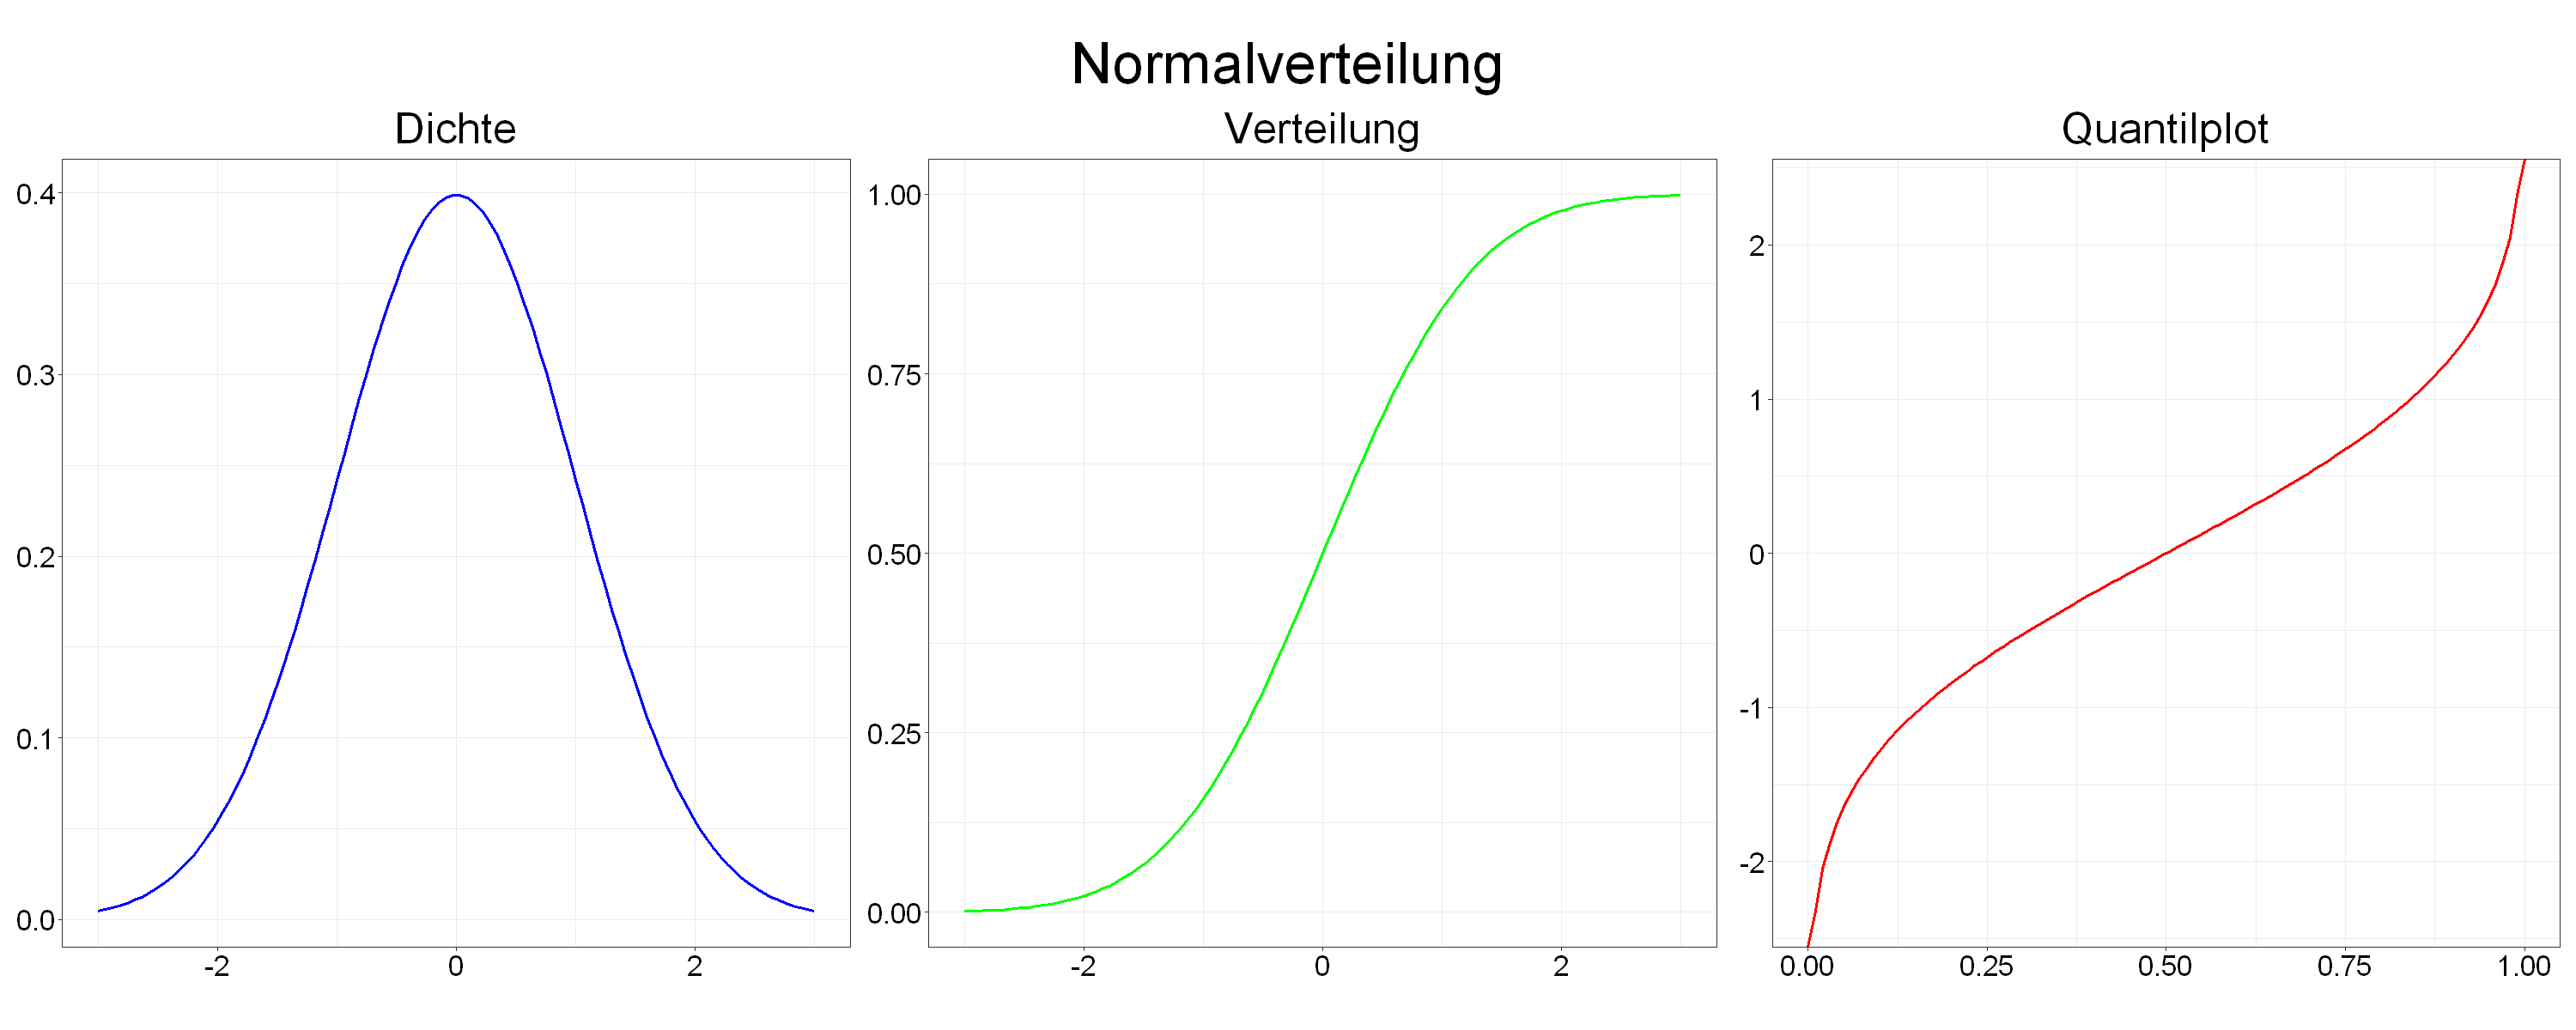

In [3]:
x <- seq(-3, 3, length=100)
distribution_plot("Normalverteilung", 
                  x <- seq(-3, 3, length=100), 
                  dnorm, 
                  pnorm, 
                  qnorm)

## Beispiel 2 : $\chi^2$-Verteilung - Rechtsschief

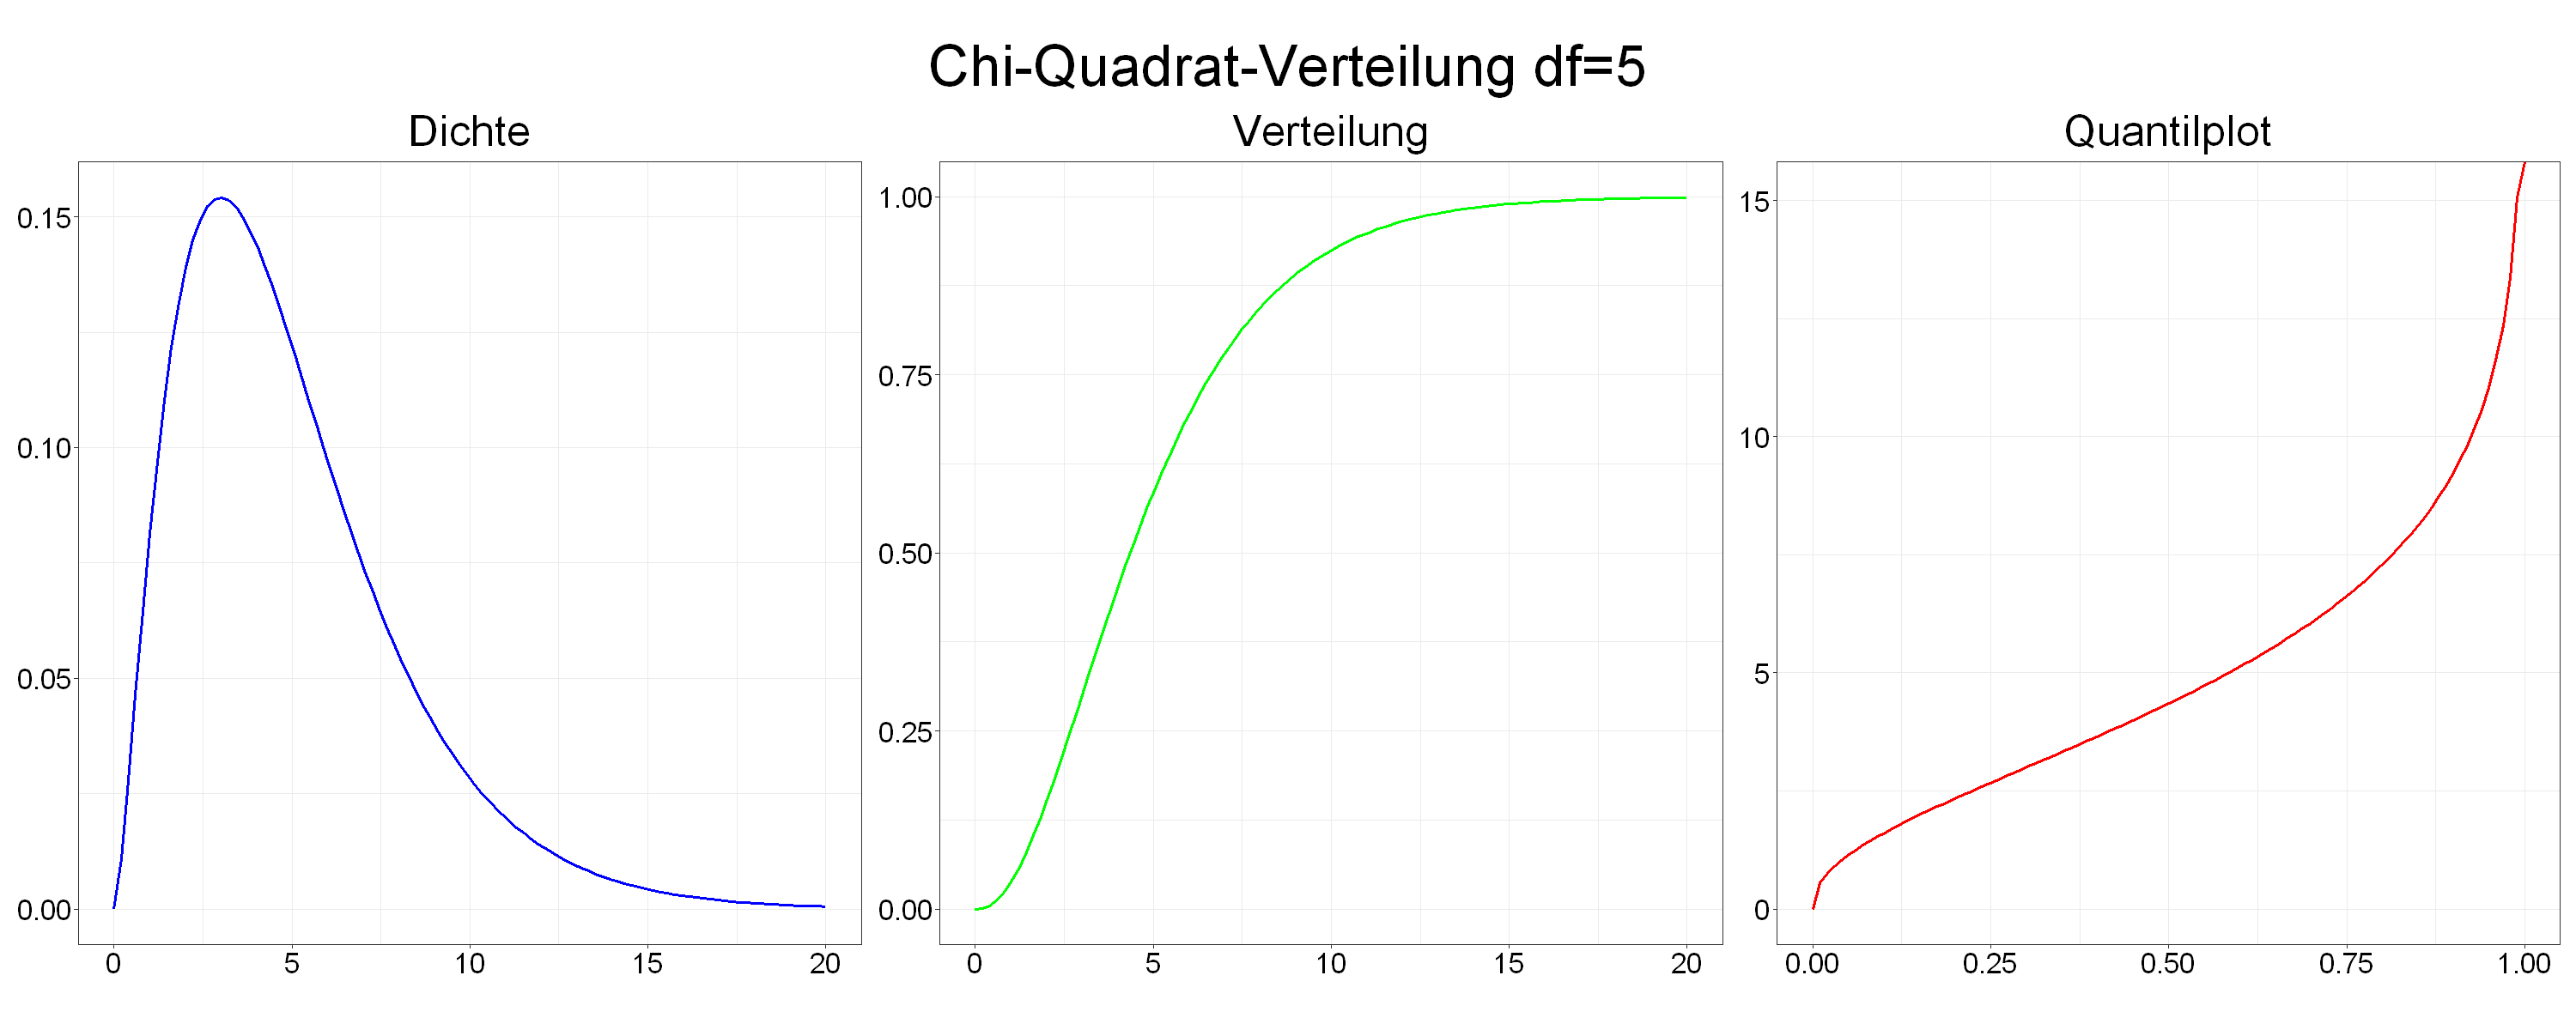

In [4]:
df <- 5
distribution_plot(sprintf("Chi-Quadrat-Verteilung df=%d",df), 
                  seq(0, 20, length=100), 
                  partial_func(dchisq, df=df), 
                  partial_func(pchisq, df=df),  
                  partial_func(qchisq, df=df))

## Beispiel 3 : Bimodale Mischverteilung 

s.a. Oldford - Figure 3 (iv)
$$
X \sim \frac{1}{2} N(0,1) + \frac{1}{2} N(6,1)
$$

### Simulation Mischverteilung

In [5]:
mu1 <- 0
sigma1 <- 1
mu2 <- 6
sigma2 <- 1

a <- 0.5
b <- 0.5

n <- 100000
set.seed(123)
component1 <- rnorm(n, mean = mu1, sd = sigma1)
component2 <- rnorm(n, mean = mu2, sd = sigma2)
mixture_data <- ifelse(runif(n) < 0.5, component1, component2) # generiere Werte aus [0,1] der Gleichverteilung

# Empirische Dichtefunktion
density_estimate <- density(mixture_data)
empirical_pdf <- approxfun(density_estimate$x, density_estimate$y)

# Empirische Verteilungsfunktion
empirical_cdf = ecdf(mixture_data)

# Auswertung PDF und CDF
x <- seq(-3, 10, length=100)
pdf_data <- data.frame(x = x, y = empirical_pdf(x))
cdf_data <- data.frame(x = x, y = empirical_cdf(x))

# Quantile
p <- seq(0, 1, length=100)
quantile_data <- data.frame(x = p, y = quantile(mixture_data, p))

### Plot

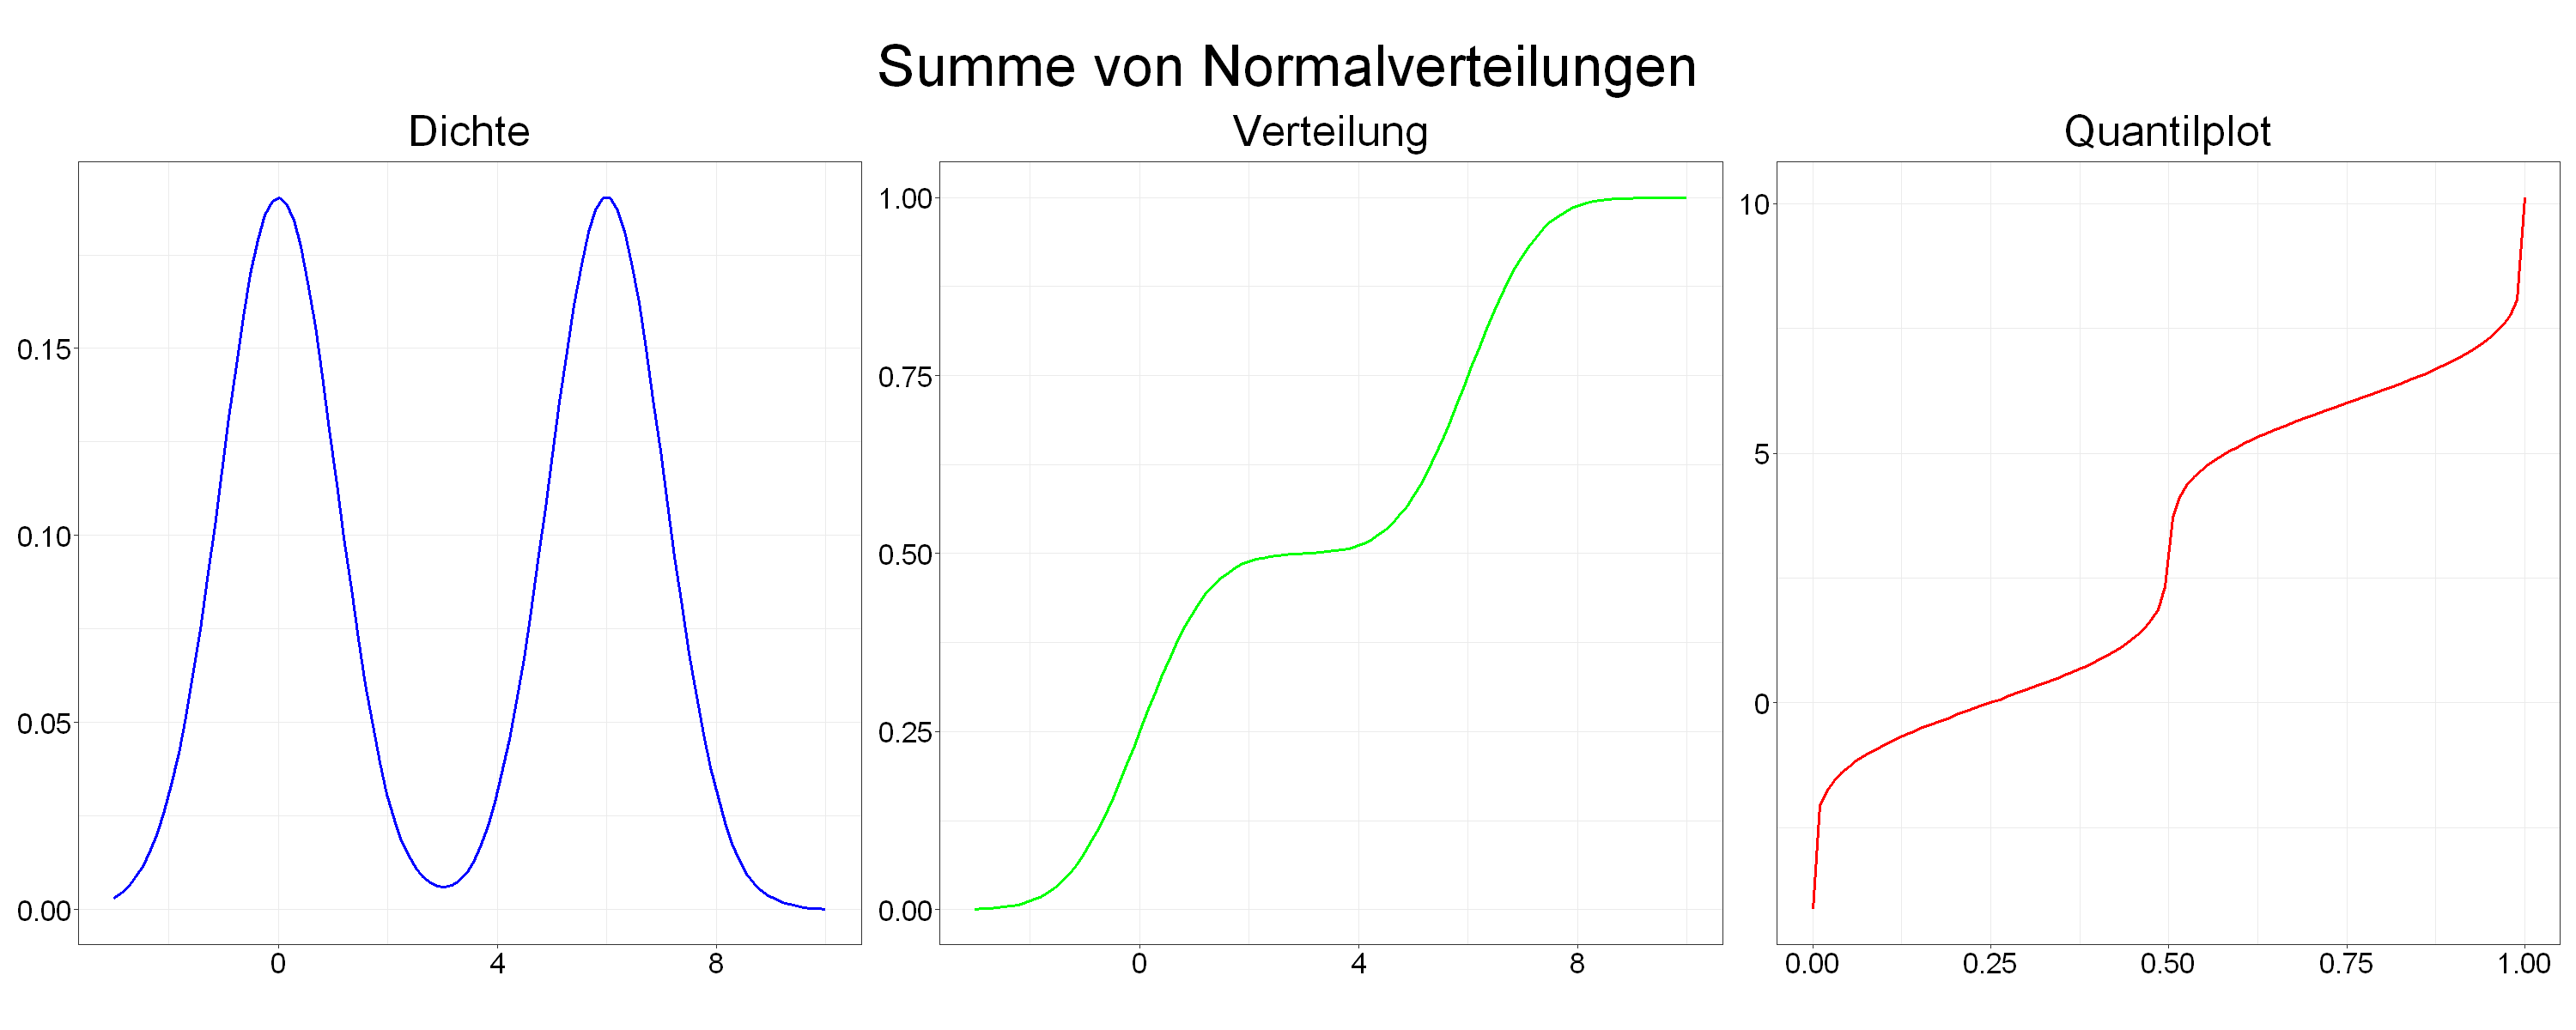

In [6]:
sample_plot("Summe von Normalverteilungen", 
            pdf_data, 
            cdf_data, 
            quantile_data)